# Feature Extraction

- reference: <https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py>

In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

X = digits.data
y = digits.target

n_samples, n_features = X.shape

In [3]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

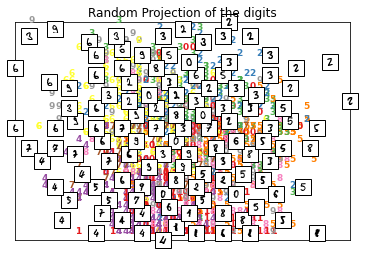

In [11]:
from sklearn import random_projection

rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, 'Random Projection of the digits')

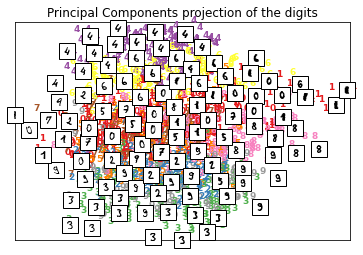

In [4]:
from sklearn import decomposition

X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca, 'Principal Components projection of the digits')

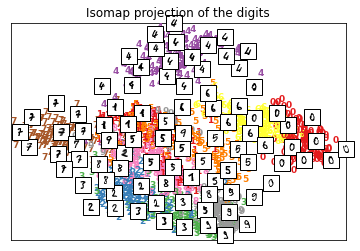

In [5]:
from sklearn import manifold

n_neighbors = 30
X_iso = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(X)
plot_embedding(X_iso, 'Isomap projection of the digits')

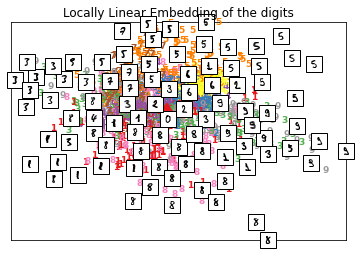

In [6]:
from sklearn import manifold

n_neighbors = 30
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,
                                      method='standard')
X_lle = clf.fit_transform(X)
plot_embedding(X_lle, "Locally Linear Embedding of the digits")

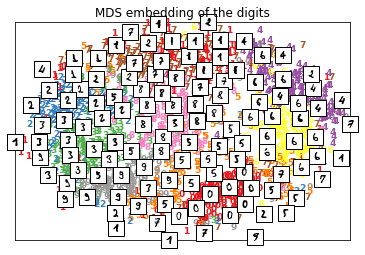

In [7]:
from sklearn import manifold

clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
X_mds = clf.fit_transform(X)
plot_embedding(X_mds, 'MDS embedding of the digits')

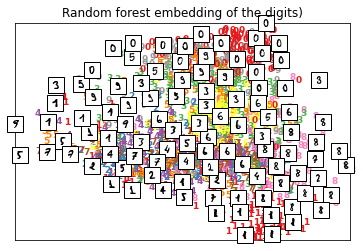

In [13]:
from sklearn import ensemble

hasher = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,
                                       max_depth=5)
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)

plot_embedding(X_reduced, 'Random forest embedding of the digits)')

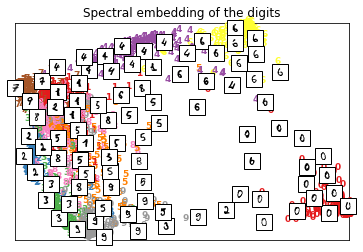

In [15]:
from sklearn import manifold

embedder = manifold.SpectralEmbedding(n_components=2, random_state=0,
                                      eigen_solver='arpack')
X_se = embedder.fit_transform(X)
plot_embedding(X_se, 'Spectral embedding of the digits')

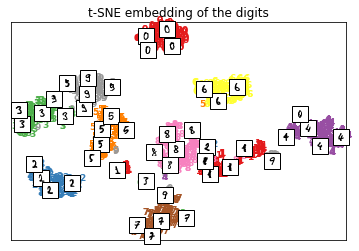

In [8]:
from sklearn import manifold

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, 't-SNE embedding of the digits')